In [139]:
import geopandas as gpd
import pandas as pd

In [140]:
gdf = gpd.read_file('../data/shapefiles/turkeyborder/TUR_adm1.shp')

<Axes: >

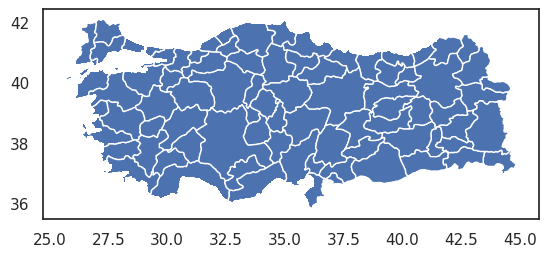

In [141]:
gdf.plot()

In [142]:
df = pd.read_csv('../data/datasets/migration-city-data.csv')

In [143]:
replace_map = {
    'K. Maras': 'Kahramanmaras',
    'Kinkkale': 'Kirikkale',
    'Zinguldak': 'Zonguldak',
    'Afyon': 'Afyonkarahisar'
}

gdf['NAME_1'] = gdf['NAME_1'].replace(replace_map)

In [144]:
turkish_chars = {
    'İ':'I',
    'ı':'i',
    'Ş':'S',
    'ş':'s',
    'Ğ':'G',
    'ğ':'g',
    'Ü':'U',
    'ü':'u',
    'Ö':'O',
    'ö':'o',
    'Ç':'C',
    'ç':'c',
}
translation_table = str.maketrans(turkish_chars)

df['city'] = df['city'].str.translate(translation_table)
gdf['NAME_1'] = gdf['NAME_1'].str.translate(translation_table)

In [145]:
gdf = gdf.merge(df, how='left', left_on='NAME_1', right_on='city')

<Axes: >

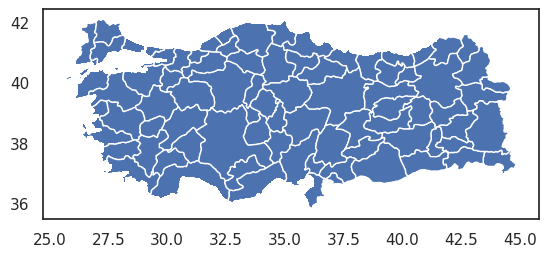

In [146]:

gdf.plot()

/tmp/ipykernel_71429/1983754791.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, city_name in zip(gdf['geometry'].centroid.x, gdf['geometry'].centroid.y, gdf['city']):


Text(0.5, 1.0, 'Sehir bazli alinan ic goc sayisi (2022)')

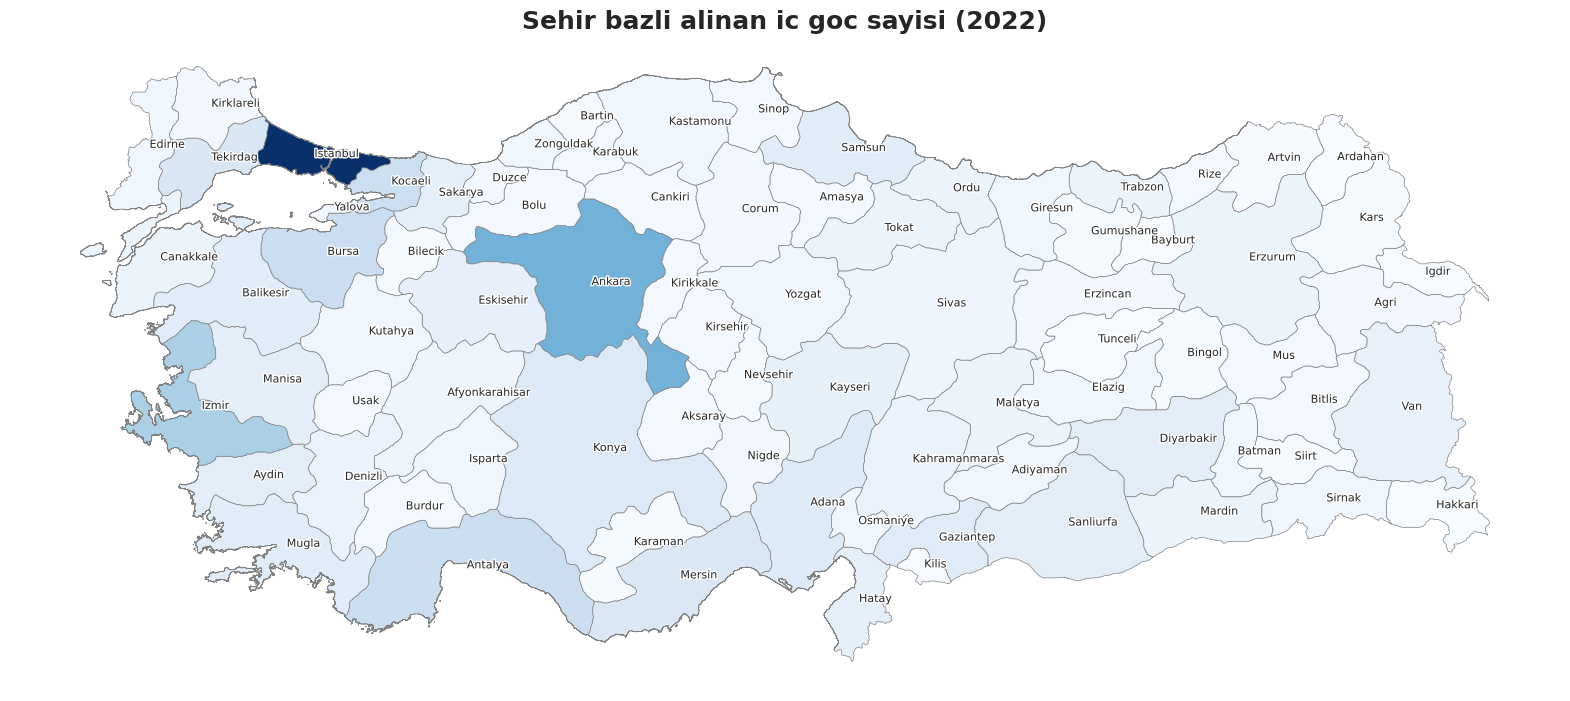

In [147]:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt 

ax = gdf.plot(
    column="value",
    cmap="Blues",
    figsize=(20,10),
    edgecolor='gray',
    linewidth=0.5
)

ax.set_axis_off()

for x, y, city_name in zip(gdf['geometry'].centroid.x, gdf['geometry'].centroid.y, gdf['city']):
    ax.text(
        x, y, city_name, fontsize=8, path_effects=[pe.withStroke(linewidth=2, foreground='white')]
    )

ax.set_title(
    "Sehir bazli alinan ic goc sayisi (2022)",
    fontsize=18,
    fontdict={"fontweight":'bold'}
)


# export

# plt.savefig(
#     "sehir-bazli-goc-2022.png",
#     dpi=300,
#     bbox_inches='tight'
# )
